# Predicting stock market price using Recurrent Neural Network
We would like to predict Google stock market price for Jan. 2017 using data from Jan. 2012 to Dec. 2016

## Part 1 - Data Preprocessing

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
# filter warnings
warnings.filterwarnings('ignore')

### Importing the data set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


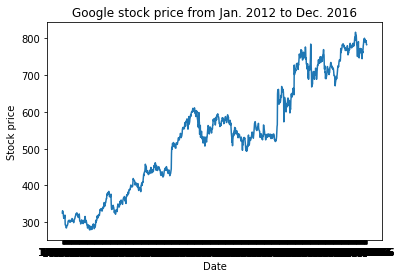

In [5]:
# plot 
plt.plot(dataset_train['Date'],dataset_train['Open'])
plt.title('Google stock price from Jan. 2012 to Dec. 2016')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.show()

## Extract the training set

In [6]:
# pick the second column as the training set
training_set = dataset_train.iloc[:, 1:2].values
type(training_set)

numpy.ndarray

### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
# normalize values to numbers in [0 1]
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0:5])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


### Creating a data structure with n timesteps and 1 output
The output is predicted by looking at the previous n time steps 

In [8]:
def Extract_XandY(n,scaled_data):
    X_train = []
    y_train = []
    for i in range(n, len(scaled_data)):
        X_train.append(scaled_data[i-n:i, 0])
        y_train.append(scaled_data[i, 0])

    # transform the lists into numpy arrays
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

## Here, we choose n=60 that it is equivalent to 3 months!

In [9]:
n = 60
X_train, y_train = Extract_XandY(n,training_set_scaled)
X_train.shape

(1198, 60)

### Reshaping

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [12]:
class LSTM_Regressor(Model):
  def __init__(self):
    super(LSTM_Regressor,self).__init__()
    # Initialising the RNN
    self.regressor = Sequential([
    # Adding the first LSTM layer and some Dropout regularisation
    layers.LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    layers.Dropout(0.2),
    # Adding a second LSTM layer and some Dropout regularisation
    layers.LSTM(units = 70, return_sequences = True),
    layers.Dropout(0.2),
    # Adding a third LSTM layer and some Dropout regularisation
    layers.LSTM(units = 70, return_sequences = True),
    layers.Dropout(0.2),
    # Adding a fourth LSTM layer and some Dropout regularisation
    layers.LSTM(units = 70, return_sequences = True),
    layers.Dropout(0.2),
    # Adding a fifth LSTM layer and some Dropout regularisation
    layers.LSTM(units = 70),
    layers.Dropout(0.2),
    # Adding the output layer
    layers.Dense(units = 1)
    ])
  def call(self,x):
      return self.regressor(x)
      

In [13]:
regressor = LSTM_Regressor()

### Compiling the RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 96ms/step - loss: 0.0936
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0086
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0036
Epoch 13/100
38/38

38/38 [==============================] - 4s 115ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0016


In [16]:
regressor.summary()

Model: "lstm__regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1)                 178151    
Total params: 178,151
Trainable params: 178,151
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Making the predictions and visualising the results

### Import the test set

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


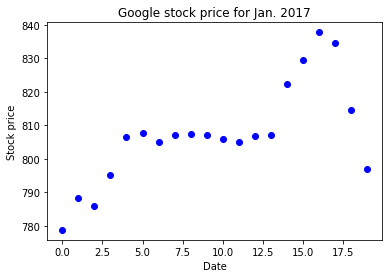

In [19]:
# plot 
plt.plot(real_stock_price,'bo')
plt.title('Google stock price for Jan. 2017')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.show()

### Predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # stack vertically
inputs = dataset_total[len(dataset_total) - len(dataset_test) - n:].values
inputs = inputs.reshape(-1,1)
# scale values
inputs = sc.transform(inputs)

X_test = []
for i in range(n, n + len(dataset_test)):
    X_test.append(inputs[i-n:i, 0])
    
# transform the list to numpyarray
X_test = np.array(X_test)
# add a dimension to it
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Scaled values
predicted_stock_price = regressor.predict(X_test)
# real values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

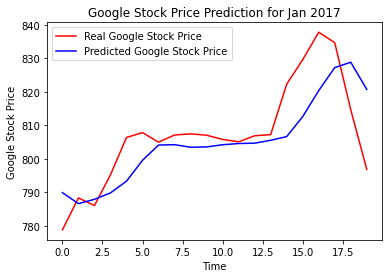

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction for Jan 2017')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()